Note: This project uses python 3 and graphviz.

In [1]:
#load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
import seaborn as sns
import graphviz as gr

from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, tree
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#set precision  
pd.options.display.float_format = '{:20,.2f}'.format

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\rapef\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rapef\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Applying Machine Learning to Predict Heart Disease

# 1. Introduction


Coronary heart disease (CHD) is one of the leading causes of death in Canada. According to the Public Health Agency of Canada, 48,000 people died in 2012 alone (2017). There are numerous factors that can contribute to the development of CHD. Knowing the medical history of a patient and learning of those factors can help to improve diagnostics in health care and ameliorate a patient's condition and potentially save their life. 
Often, not all information is available to the medical staff to assess if a patient suffers from heart problems. For example, in situations like an emergency call, only a few features are given.

This project will explore different classification models to predict a heart disease through supervised learning. It will evaluate these models using accuracy and confusion matrices, among others. Additionally, it will explore which attributes are most important or useful for classification. Lastly, it will touch upon possible applications and ethical issues of applying machine learning tools to predict health parameters.

# 1.1 Description of Dataset

Source: http://archive.ics.uci.edu/ml/datasets/heart+disease

Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

Donor: 
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

The source used provides four different databases - Cleveland, Hungary, Switzerland, and the VA Long Beach. 
However, the Cleveland one has the least amount of missing values, so the focus will lie on this data set.

I have used the processed files provided and edited the labels for variables and categories for better readability and understanding. In detail, each entry, patient information, is categorized by the following 14 attributes:

    #1 age [29 - 77]
    #2 sex [female, male]
    #3 chest_pain [typical, atypical, symptomatic, nonanginal]
    #4 blood_pressure [94 - 200]
    #5 chol_serum [126 - 564]
    #6 fasting_bs [below 120 mg/dl, above 120 mg/dl]
    #7 resting_ecg [normal, LVH, ST-wave abnormality]
    #8 max_heart_rate [202] 
    #9 ex_induced_angina [no, yes]
    #10 st_depression [0.00 - 6.20]
    #11 slope_st_peak [downloaping, upsloping, flat]
    #12 num_major_vessels [0 - 4]
    #13 thalassemia [normal , fixed defect, reversable defect]
    #14 diagonis_CHD [no, yes] (there are four different positive classes that depend on the percentage of diameter narrowing of a vessel)

# 1.2 Summary of Dataset

In [2]:
#read in file
#drop column
heart = pd.read_csv('cleveland.csv')
#heart = heart.drop(['Unnamed: 0'], axis=1)

In [3]:
print('Number of Entries:\n')
print('Feature\t\t     Count\n%s' %heart.count() )

Number of Entries:

Feature		     Count
age                  303
sex                  303
chest_pain           303
blood_pressure       303
chol_serum           303
fasting_bs           303
resting_ecg          303
max_heart_rate       303
ex_induced_angina    303
st_depression        303
slope_st_peak        303
num_major_vessels    299
thalassemia          301
diagnosis_CHD        303
dtype: int64


In [4]:
print('First 10 entries:')
heart.head(10)

First 10 entries:


,age,sex,chest_pain,blood_pressure,chol_serum,fasting_bs,resting_ecg,max_heart_rate,ex_induced_angina,st_depression,slope_st_peak,num_major_vessels,thalassemia,diagnosis_CHD
0,63,male,typical,145,233,above 120,LVH,150,no,2.30,downsloping,0.00,fixed defect,no
1,67,male,asymptomatic,160,286,below 120,LVH,108,yes,1.50,flat,3.00,normal,yes
2,37,male,nonanginal,130,250,below 120,normal,187,no,3.50,downsloping,0.00,normal,no
3,41,female,atypical,130,204,below 120,LVH,172,no,1.40,upsloping,0.00,normal,no
4,56,male,atypical,120,236,below 120,normal,178,no,0.80,upsloping,0.00,normal,no
5,62,female,asymptomatic,140,268,below 120,LVH,160,no,3.60,downsloping,2.00,normal,yes
6,57,female,asymptomatic,120,354,below 120,normal,163,yes,0.60,upsloping,0.00,normal,no
7,63,male,asymptomatic,130,254,below 120,LVH,147,no,1.40,flat,1.00,reversable defect,yes
8,53,male,asymptomatic,140,203,above 120,LVH,155,yes,3.10,downsloping,0.00,reversable defect,yes
9,57,male,asymptomatic,140,192,below 120,normal,148,no,0.40,flat,0.00,fixed defect,no


In [5]:
print('Last five entries:')
heart.tail(5)

Last five entries:


,age,sex,chest_pain,blood_pressure,chol_serum,fasting_bs,resting_ecg,max_heart_rate,ex_induced_angina,st_depression,slope_st_peak,num_major_vessels,thalassemia,diagnosis_CHD
298,35,male,atypical,122,192,below 120,normal,174,no,0.00,upsloping,0.00,normal,no
299,56,male,atypical,120,240,below 120,normal,169,no,0.00,downsloping,0.00,normal,no
300,63,female,asymptomatic,124,197,below 120,normal,136,yes,0.00,flat,0.00,normal,yes
301,59,male,asymptomatic,164,176,above 120,LVH,90,no,1.00,flat,2.00,fixed defect,yes
302,57,female,asymptomatic,140,241,below 120,normal,123,yes,0.20,flat,0.00,reversable defect,yes


# 1.2.1 Quantitative data:

There are six different quantitative features:
    #1 age 
    #4 blood_pressure: resting blood pressure in mmHg
    #5 chol_serum: serum cholesterol in mg/dl
    #8 max_heart_rate: maximum heart rate BPM
    #10 st_depression: ST depression refers to an abnormally low ST segment in an electrocardiogram
    #12 num_major_vessels: number of major blood vessels affected

In [6]:
heart[['age','blood_pressure', 'chol_serum', 'max_heart_rate', 'st_depression', 'num_major_vessels']].describe()

,age,blood_pressure,chol_serum,max_heart_rate,st_depression,num_major_vessels
count,303.00,303.00,303.00,303.00,303.00,299.00
mean,54.44,131.69,246.69,149.61,1.04,0.67
std,9.04,17.60,51.78,22.88,1.16,0.94
min,29.00,94.00,126.00,71.00,0.00,0.00
25%,48.00,120.00,211.00,133.50,0.00,0.00
50%,56.00,130.00,241.00,153.00,0.80,0.00
75%,61.00,140.00,275.00,166.00,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00


C:\Users\rapef\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


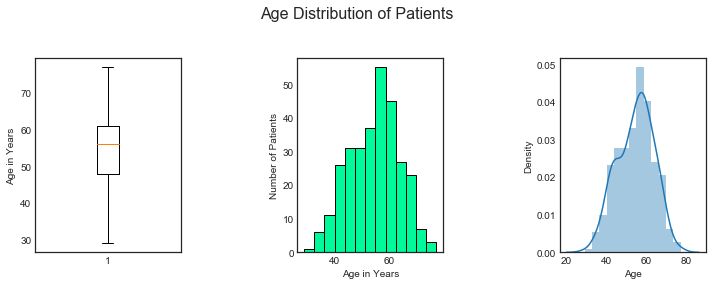

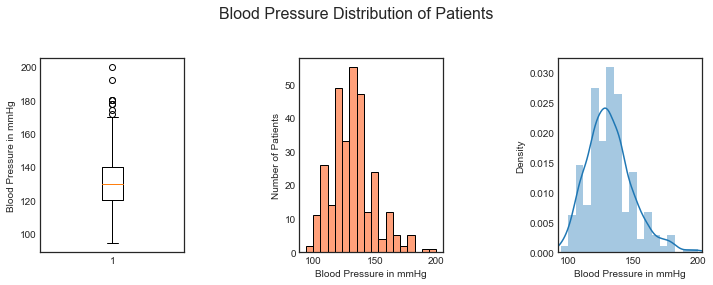

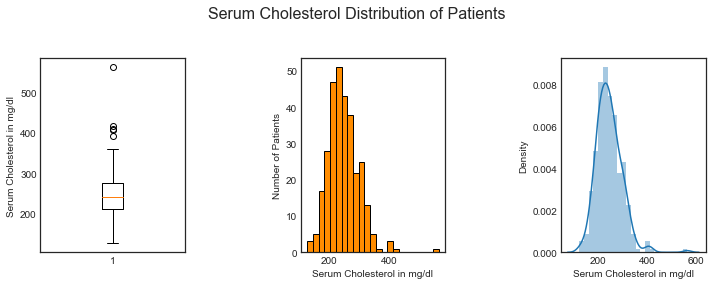

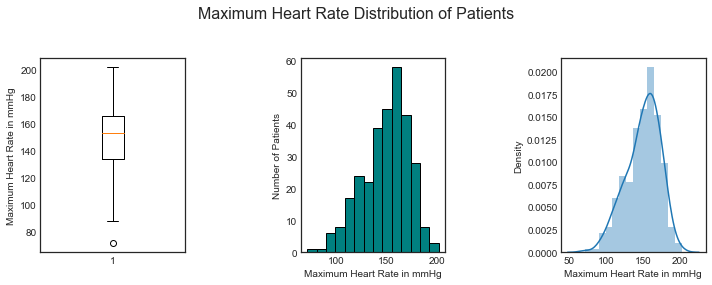

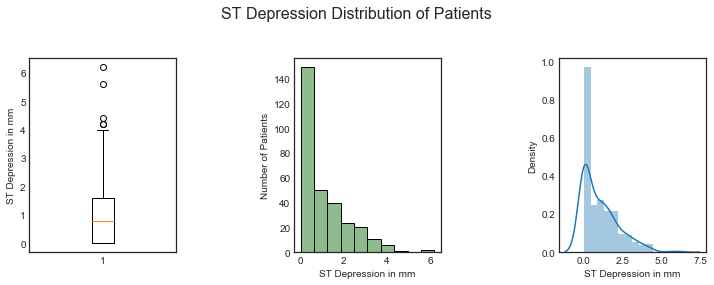

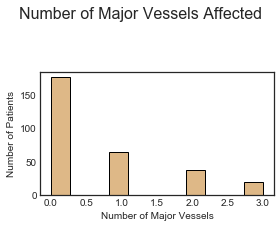

In [7]:
#Show diagrams and plots

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Age Distribution of Patients',fontsize=16)

axes[0].boxplot(heart['age'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Age in Years')


axes[1].hist(heart['age'], bins = 'auto', color = 'mediumspringgreen', edgecolor = 'black')
axes[1].set_xlabel('Age in Years')
axes[1].set_ylabel('Number of Patients')

sns.distplot(heart['age'])
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)


fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Blood Pressure Distribution of Patients',fontsize=16)

axes[0].boxplot(heart['blood_pressure'])
axes[0].set_xlabel('')
plt.xlim(92,203)
axes[0].set_ylabel('Blood Pressure in mmHg')

axes[1].hist(heart['blood_pressure'], bins = 'auto', color = 'lightsalmon', edgecolor = 'black')
plt.xlim(92,203)
axes[1].set_xlabel('Blood Pressure in mmHg')
axes[1].set_ylabel('Number of Patients')

sns.distplot(heart['blood_pressure'])
plt.xlabel('Blood Pressure in mmHg')
plt.ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)


fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Serum Cholesterol Distribution of Patients',fontsize=16)

axes[0].boxplot(heart['chol_serum'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Serum Cholesterol in mg/dl')

axes[1].hist(heart['chol_serum'], bins = 'auto', color = 'darkorange', edgecolor = 'black')
axes[1].set_xlabel('Serum Cholesterol in mg/dl')
axes[1].set_ylabel('Number of Patients')

sns.distplot(heart['chol_serum'])
plt.xlabel('Serum Cholesterol in mg/dl')
plt.ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)


fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Maximum Heart Rate Distribution of Patients',fontsize=16)

axes[0].boxplot(heart['max_heart_rate'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Maximum Heart Rate in mmHg')

axes[1].hist(heart['max_heart_rate'], bins = 'auto', color = 'teal', edgecolor = 'black')
axes[1].set_xlabel('Maximum Heart Rate in mmHg')
axes[1].set_ylabel('Number of Patients')

sns.distplot(heart['max_heart_rate'])
plt.xlabel('Maximum Heart Rate in mmHg')
plt.ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('ST Depression Distribution of Patients',fontsize=16)

axes[0].boxplot(heart['st_depression'])
axes[0].set_xlabel('')
axes[0].set_ylabel('ST Depression in mm')

axes[1].hist(heart['st_depression'], bins = 10, color = 'darkseagreen', edgecolor = 'black')
axes[1].set_xlabel('ST Depression in mm')
axes[1].set_ylabel('Number of Patients')

sns.distplot(heart['st_depression'])
plt.xlabel('ST Depression in mm')
plt.ylabel('Density')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)

fig, axes = plt.subplots(1, 3, figsize=(4, 5))
x = np.arange(0, 9, 0.25)
plt.suptitle('Number of Major Vessels Affected',fontsize=16)

plt.subplot(211)
plt.hist(heart['num_major_vessels'].dropna(), bins = 'auto', color = 'burlywood', edgecolor = 'black')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.subplots_adjust(wspace=0.8, top=0.8)

##display all
plt.show()

# 1.2.2 Qualitative Data:

    #2 sex
    #3 chest_pain: type of chest pain
    #6 fasting_bs: fasting blood sugar in mg/dl
    #7 resting_ecg: resting ECG
    #9 ex_induced_angina: execise induced angina
    #11 slope_st_peak: change in ST segment with exercise stress in an electrocardiogram
    #13 thalassemia: faulty hemoglobin synthesis
    #14 diagnosis_chd: diagnosis of a coronary heart disease classified by over 50% narrowing of a blood vessel 

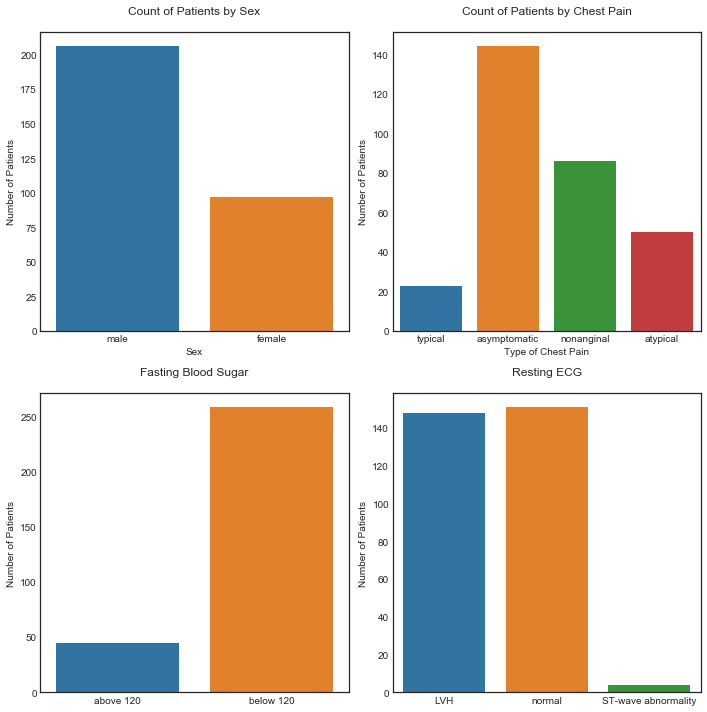

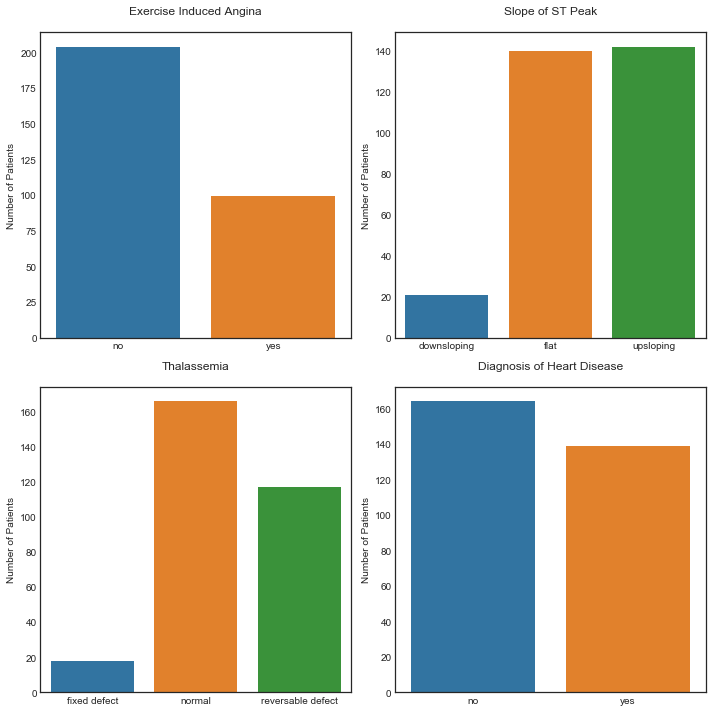

In [8]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)

sns.countplot(heart['sex'])
ax1.set_title('Count of Patients by Sex\n')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of Patients')

ax2 = fig.add_subplot(222)

sns.countplot(heart['chest_pain'])
ax2.set_title('Count of Patients by Chest Pain\n')
ax2.set_xlabel('Type of Chest Pain')
ax2.set_ylabel('Number of Patients')

ax3 = fig.add_subplot(223)

sns.countplot(heart['fasting_bs'])
ax3.set_title('Fasting Blood Sugar\n')
ax3.set_xlabel('')
ax3.set_ylabel('Number of Patients')

plt.subplot(224)
sns.countplot(heart['resting_ecg'])
plt.title('Resting ECG\n')
plt.xlabel('')
plt.ylabel('Number of Patients')

fig.tight_layout()

plt.show()

fig1 = plt.figure(figsize=(10,10))

ax5 = fig1.add_subplot(221)
sns.countplot(heart['ex_induced_angina'])
ax5.set_title('Exercise Induced Angina\n')
ax5.set_xlabel('')
ax5.set_ylabel('Number of Patients')

ax6 = fig1.add_subplot(222)
sns.countplot(heart['slope_st_peak'])
ax6.set_title('Slope of ST Peak\n')
ax6.set_xlabel('')
ax6.set_ylabel('Number of Patients')

ax7 = fig1.add_subplot(223)
sns.countplot(heart['thalassemia'].dropna())
ax7.set_title('Thalassemia\n')
ax7.set_xlabel('')
ax7.set_ylabel('Number of Patients')

ax8 = fig1.add_subplot(224)
sns.countplot(heart['diagnosis_CHD'])
ax8.set_title('Diagnosis of Heart Disease\n')
ax8.set_xlabel('')
ax8.set_ylabel('Number of Patients')

fig1.tight_layout()

#plt.suptitle('Qualitative Feature Count',fontsize=16)
plt.show()


# 3. Classification

The main objective of this project is to predict if a patient has a heart disease.

To this end, different models where trained using assigned training set. Then, predictions where made using the testing set.  
After making predictions, the models were evaluated using accuracy and confusion matrices among others.

The algorithms used in this project are:
    1. k-Nearest Neighbours
    2. Logistic Regression
    3. Tree structures (Decision Trees, Gradient Boost, Random Forest)
    4. Neural Networks
    5. Feature Selection

# 3.1 Preparation of Data and Problems

In the beginning, there were problems when fitting the data points. 

Since the algorithms work with numerical values instead of strings, the variables were transformed into binary values using the get_dummies() function. However, many of the predictors, such as chest_pain, have non-binary categories (e.g. typical, atypical, symptomatic, nonanginal). When creating dummy values, this lead to additional and redundant features (e.g. chest_pain_typical, chest_pain_atypical, chest_pain_symptomatic, chest_pain_nonanginal). These "dummy-features" contributed to inaccuracies and errors - the data could not be fit to the model.

This problem with categorical values was solved using the LabelEncoder() which assigns a number to each of the data points. 

In [9]:
heart = pd.read_csv('cleveland.csv').dropna()
#heart = heart.drop(['Unnamed: 0'], axis = 1)

print('These are the transformed features and their categories\n')

le = preprocessing.LabelEncoder()

le.fit(heart['sex'])
heart.sex = le.transform(heart['sex'])
print( 'Sex: %s' %list(le.classes_) )

le.fit(heart['chest_pain'])
heart.chest_pain = le.transform(heart['chest_pain'])
print( 'Types of Chest Pain: %s' %list(le.classes_) )

le.fit(heart['fasting_bs'])
heart.fasting_bs = le.transform(heart['fasting_bs'])
print( 'Fasting Blood Sugar: %s' %list(le.classes_) )

le.fit(heart['resting_ecg'])
heart.resting_ecg = le.transform(heart['resting_ecg'])
print( 'Resting ECG: %s' %list(le.classes_) )

le.fit(heart['ex_induced_angina'])
heart.ex_induced_angina = le.transform(heart['ex_induced_angina'])
print( 'Exersice Induced Angina: %s' %list(le.classes_) )

le.fit(heart['slope_st_peak'])
heart.slope_st_peak = le.transform(heart['slope_st_peak'])
print( 'Slope of ST Peak: %s' %list(le.classes_) )

le.fit(heart['thalassemia'])
heart.thalassemia = le.transform(heart['thalassemia'])
print( 'Thalassemia: %s' %list(le.classes_) )

le.fit(heart['diagnosis_CHD'])
heart.diagnosis_CHD = le.transform(heart['diagnosis_CHD'])
print( 'Diagnosed with Coronary Heart Disease: %s' %list(le.classes_) )

These are the transformed features and their categories

Sex: ['female', 'male']
Types of Chest Pain: ['asymptomatic', 'atypical', 'nonanginal', 'typical']
Fasting Blood Sugar: ['above 120', 'below 120']
Resting ECG: ['LVH', 'ST-wave abnormality', 'normal']
Exersice Induced Angina: ['no', 'yes']
Slope of ST Peak: ['downsloping', 'flat', 'upsloping']
Thalassemia: ['fixed defect', 'normal', 'reversable defect']
Diagnosed with Coronary Heart Disease: ['no', 'yes']


# 3.1 k-Nearest Neighbours 

When trying to predict coronary heart diseases, the first approach was to fit the model using k-Nearest Neighbours, which will be referred to as kNN.

The algorithm was chosen because it works in a way that can be explained easily to people that have little or no experience in computing. This criteria is important because the decisions made by the machine have to be tracked and justified - especially in the medical field.

kNN performs in the following way: Given a positive integer k and a test observation x0, the classifier considers the k points in the training data that are closest to x0. Then, it calculates the conditional probability for the class j and assigns the test observation to the class with the largest probability; If the points closest to x0 have class j, x0 must belong to j as well.

## 3.1.1 kNN Using All Features

As a starting point, all features were included to predict a heart disease.
Using the train_test_split() function, 50% of the data was used as training data, and the other half as testing data.
In three trials, the k-value was changed from 3 to 5 to 10. This was done to see if increasing the "neighbourhood" would lead to more accurate results. 
However, it must be noted that a consequence of a very small k-value is overfitting the data - we obtain good predictions on the training data because we trace every data point, but the model struggles with new values (testing data). Although, increasing the value of k should reduce this problem of overfitting, the larger the k, the more "smoothing" takes places and the model underfits the data.

In [10]:
#our predictor is 'diagnosis_CHD' 
Y = heart['diagnosis_CHD']
# use all features to predict
X = heart.drop(['diagnosis_CHD'], axis=1)

In [11]:
#Select 50% of the data as training data 
X1_train, X1_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [12]:
print('Train kNN model with k = 3\n')
knn = KNeighborsClassifier(3)
knn.fit(X1_train, Y_train)

#Make prediction using X_test
prediction = knn.predict(X1_test)

#Show accuracy and confusion matrix
confusionM = confusion_matrix(Y_test, prediction, labels=knn.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM)
accuracy = accuracy_score(Y_test, prediction)
print('\nAccuracy:')
print(accuracy)


print('\nTrain kNN model with k = 5\n')
knn0 = KNeighborsClassifier(5)
knn0.fit(X1_train, Y_train)

#Make prediction using X_test
prediction0 = knn0.predict(X1_test)

#Show accuracy and confusion matrix
confusionM0 = confusion_matrix(Y_test, prediction0, labels=knn0.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM0)
accuracy0 = accuracy_score(Y_test, prediction0)
print('\nAccuracy:')
print(accuracy0)

print('\nTrain kNN model with k = 10\n')
knn1 = KNeighborsClassifier(10)
knn1.fit(X1_train, Y_train)

#Make prediction using X_test
prediction1 = knn1.predict(X1_test)

#Show accuracy and confusion matrix
confusionM1 = confusion_matrix(Y_test, prediction1, labels=knn1.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM1)
accuracy1 = accuracy_score(Y_test, prediction1)
print('\nAccuracy:')
print(accuracy1)

Train kNN model with k = 3

Confusion matrix:

No Yes
[[50 27]
 [32 40]]

Accuracy:
0.6040268456375839

Train kNN model with k = 5

Confusion matrix:

No Yes
[[52 25]
 [34 38]]

Accuracy:
0.6040268456375839

Train kNN model with k = 10

Confusion matrix:

No Yes
[[59 18]
 [33 39]]

Accuracy:
0.6577181208053692


Using all features, the best accuracy is obtained using k = 10 with the highest number of true negatives ("no" when it is "no").

## 3.1.2 kNN Using Some Features

The next step is to examine some of the features that would most likely be available.

Suppose health authorities receive an emergency call and the only information given is the age, sex and possibly the type of chest pain the affected person is having. 
In scenarios like this, how accurate does kNN predict a heart disease using only age and sex, and does it make more accurate predictions if the type of chest pain is included?

To investigate this, the models were trained using k = 10 since it previously showed the best accuracy, and then evaluated.

In [13]:
Y = heart['diagnosis_CHD']

# use only age and sex
X21 = heart[['age', 'sex']]

#use chest_pain as additional feature
X22 = heart[['age', 'sex', 'chest_pain']]

In [14]:
#Select 50% of the data as training data 
X21_train, X21_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)
#Select 50% of the data as training data 
X22_train, X22_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [15]:
# since k = 10 showed the best accuracy out of all the three previous models, the models with be trained with k = 10

print('\nTrain kNN model with k = 10 and two features, age and sex: \n')
knn21 = KNeighborsClassifier(10)
knn21.fit(X21_train, Y_train)

#Make prediction using X_test
prediction21 = knn21.predict(X21_test)

#Show accuracy and confusion matrix
confusionM21 = confusion_matrix(Y_test, prediction21, labels=knn21.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM21)
accuracy21 = accuracy_score(Y_test, prediction21)
print('\nAccuracy:')
print(accuracy21)

print('\nTrain kNN model with k = 10 and three features, age, sex and type of chest pain: \n')
knn22 = KNeighborsClassifier(10)
knn22.fit(X22_train, Y_train)

#Make prediction using X_test
prediction22 = knn22.predict(X22_test)

#Show accuracy and confusion matrix
confusionM22 = confusion_matrix(Y_test, prediction22, labels=knn22.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM22)
accuracy22 = accuracy_score(Y_test, prediction22)
print('\nAccuracy:')
print(accuracy22)


Train kNN model with k = 10 and two features, age and sex: 

Confusion matrix:

No Yes
[[59 18]
 [33 39]]

Accuracy:
0.6577181208053692

Train kNN model with k = 10 and three features, age, sex and type of chest pain: 

Confusion matrix:

No Yes
[[59 18]
 [33 39]]

Accuracy:
0.6577181208053692


Using only two and then three of the features resulted in the same accuracy as when using all the thirteen features - the accuracy is 65.77% with 59 true negatives, and 39 true positives. Although, the result is better than a random guess, 65.77% is too inaccurate to be applied in a real life scenario. Other methods have to be considered.

## 3.1.3 kNN & Feature Subset Selection

Using only kNN, there were no significant differences in accuracies. 

The next question to ask is which features do affect the predictions the most.
Using Feature Subset Selection, the kNN models were trained using only 25%, 50% and 75% of the features selected.

In [16]:
#our predictor is 'diagnosis_CHD'
Y = heart['diagnosis_CHD']
X = heart.drop(['diagnosis_CHD'], axis=1)

In [17]:
#Select 50% of the data as training data 
X31_train, X31_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)
X32_train, X32_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)
X33_train, X33_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [18]:
perc25 = 25 # percentage of features to keep 

select25 = SelectPercentile(f_regression, percentile=perc25)
select25.fit_transform(X31_train, Y_train)
selected_cols1 = select25.get_support()
selected_fea1 = X.columns.values[selected_cols1]
print("Keeping 25% of the features, these are the features that were selected:\n")
print('\t', selected_fea1)

X31_sub_train = X31_train[selected_fea1]

X31_sub_test = X31_test[selected_fea1] 

print('\nTrain kNN model with k = 10 and the selected features\n')
knn31 = KNeighborsClassifier(10)
knn31.fit(X31_sub_train, Y_train)

#Make prediction using X_test
prediction31 = knn31.predict(X31_sub_test)

#Show accuracy and confusion matrix
confusionM31 = confusion_matrix(Y_test, prediction31, labels=knn31.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM31)
accuracy31 = accuracy_score(Y_test, prediction31)
print('\nAccuracy:')
print(accuracy31)
print('')

perc50 = 50 # percentage of features to keep 

select50 = SelectPercentile(f_regression, percentile=perc50)
select50.fit_transform(X32_train, Y_train)
selected_cols2 = select50.get_support()
selected_fea2 = X.columns.values[selected_cols2]
print("Keeping 50% of the features, these are the features that were selected:\n")
print('\t', selected_fea2)

X32_sub_train = X32_train[selected_fea2]

X32_sub_test = X32_test[selected_fea2] 

print('\nTrain kNN model with k = 10 and the selected features\n')
knn32 = KNeighborsClassifier(10)
knn32.fit(X32_sub_train, Y_train)

#Make prediction using X_test
prediction32 = knn32.predict(X32_sub_test)

#Show accuracy and confusion matrix
confusionM32 = confusion_matrix(Y_test, prediction32, labels=knn32.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM32)
accuracy32 = accuracy_score(Y_test, prediction32)
print('\nAccuracy:')
print(accuracy32)
print('')

perc75 = 75 # percentage of features to keep 

select75 = SelectPercentile(f_regression, percentile=perc75)
select75.fit_transform(X33_train, Y_train)
selected_cols3 = select75.get_support()
selected_fea3 = X.columns.values[selected_cols3]
print("Keeping 75% of the features, these are the features that were selected:\n")
print('\t', selected_fea3)

X33_sub_train = X33_train[selected_fea3]

X33_sub_test = X33_test[selected_fea3] 

print('\nTrain kNN model with k = 10 and the selected features\n')
knn33 = KNeighborsClassifier(10)
knn33.fit(X33_sub_train, Y_train)

#Make prediction using X_test
prediction33 = knn33.predict(X33_sub_test)

#Show accuracy and confusion matrix
confusionM33 = confusion_matrix(Y_test, prediction33, labels=knn33.classes_)
print('Confusion matrix:\n')
print('No', 'Yes')
print(confusionM33)
accuracy33 = accuracy_score(Y_test, prediction33)
print('\nAccuracy:')
print(accuracy33)

Keeping 25% of the features, these are the features that were selected:

	 ['max_heart_rate' 'num_major_vessels' 'thalassemia']

Train kNN model with k = 10 and the selected features

Confusion matrix:

No Yes
[[53 24]
 [30 42]]

Accuracy:
0.6375838926174496

Keeping 50% of the features, these are the features that were selected:

	 ['chest_pain' 'max_heart_rate' 'ex_induced_angina' 'st_depression'
 'num_major_vessels' 'thalassemia']

Train kNN model with k = 10 and the selected features

Confusion matrix:

No Yes
[[53 24]
 [29 43]]

Accuracy:
0.6442953020134228

Keeping 75% of the features, these are the features that were selected:

	 ['age' 'sex' 'chest_pain' 'max_heart_rate' 'ex_induced_angina'
 'st_depression' 'slope_st_peak' 'num_major_vessels' 'thalassemia']

Train kNN model with k = 10 and the selected features

Confusion matrix:

No Yes
[[55 22]
 [29 43]]

Accuracy:
0.6577181208053692


C:\Users\rapef\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Using feature selection, it was found that the features 'max_heart_rate' (maximum heart rate achieved), 'num_major_vessels' (number of major vessels affected) and 'thalassemia' (faulty hemoglobin synthesis) were of most importance. With these features only, kNN showed an accuracy of 63.76%. Including 75% of the features lead to 65.77% accuracy; there was no difference from previous models. It was concluded that different algorithms would have to be applied to improve the accuracy.

# 3.2 Logistic Regression 

Logistic Regression is a method in statistical, or machine learning, that extends Linear Regression. It is used when the outcome variable is binary, so 'Yes' or 'No' as used for predicting a heart disease. Using a probability function that takes the inputs X1,...,Xn it returns the probability of the predictor being in one of the classes, 'Yes' and 'No'. The probability function used is the sigmoid also called logistic function. We can specify the threshold - if the probability is above the threshold it will be assigned to one of the classes and vice versa. For the purpose of this project, the threshold is consistently set at 0.5.

## 3.2.1 Logistic Regression Using All Features

Initially, the Logistic Regression model will be trained using all the features available and then evaluated using accuracy, precision, recall, F-score and the area under the curve.

In [19]:
#our predictor is 'diagnosis_CHD' 
Y = heart['diagnosis_CHD']
# use all features to predict
X = heart.drop(['diagnosis_CHD'], axis=1)

In [20]:
#Select 50% of the data as training data 
X4_train, X4_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [21]:
#Train a logistic regression model and make predictions on the test set. 
logreg1 = LogisticRegression()
logreg1.fit(X4_train, Y_train)

preds1 = logreg1.predict_proba(X1_test)
classes1 = logreg1.classes_

#Set threshold to 0.5
print('Logistic Regression Model using 0.5 as Threshold\n')
threshold1 = 0.5
newpreds1 = []

for a in preds1:
    if a[0] > threshold1:
        newpreds1.append(classes1[0])
    else:
        newpreds1.append(classes1[1])

print('[No  Yes]')        
conf1 = confusion_matrix(Y_test, newpreds1)
print(conf1)

accuracy1 = accuracy_score(Y_test, newpreds1)
print('\nAccuracy for the logistic regression model:\n %s' %accuracy1)

print('\nPrecision, Recall, F-Score:')
print(precision_recall_fscore_support(Y_test, newpreds1, pos_label = 1, average = 'binary'))

p_preds1 = [p[0] for p in preds1]
pos_class1 = logreg1.classes_[0]
newlabs1 = (Y_test == pos_class1)

auc1 = roc_auc_score(newlabs1, p_preds1)
print('\nArea under the curve:')
print(auc1)

Logistic Regression Model using 0.5 as Threshold

[No  Yes]
[[68  9]
 [20 52]]

Accuracy for the logistic regression model:
 0.8053691275167785

Precision, Recall, F-Score:
(0.8524590163934426, 0.7222222222222222, 0.7819548872180451, None)

Area under the curve:
0.8780663780663781


When using logistic regression, the predictions improved. The accuracy was 80.54% with a precision of 85.25%. Compared to kNN, logistic regression performed better in determining the true positives and negatives. 

## 3.2.2 Logistic Regression using Feature Selection

As with kNN, it was of interest to find out which features influence the predictions the most. 
This question was examined using feature selection with 25%, 50% and 75% of the features. The models were then be evaluated using the same metrics as above.

In [22]:
Y = heart['diagnosis_CHD']
X = heart.drop(['diagnosis_CHD'], axis=1)

In [23]:
#Select 50% of the data as training data 
X5_train, X5_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [24]:
perc = 25 # percentage of features to keep 

print('\nSelecting 25% of the features and using 0.5 as threshold\n')
select5 = SelectPercentile(f_regression, percentile=perc)
select5.fit_transform(X5_train, Y_train)
selected_col5 = select5.get_support()
selected_fea5 = X.columns.values[selected_col5]
print("These are the features selected:")
print(selected_fea5)

X5_sub_train = X5_train[selected_fea5]

X5_sub_test = X5_test[selected_fea5] 

#Train a logistic regression model and make predictions on the test set. 
logreg5 = LogisticRegression()
logreg5.fit(X5_sub_train, Y_train)

preds5 = logreg5.predict_proba(X5_sub_test)
classes5 = logreg5.classes_

#Set threshold to 0.5
threshold5 = 0.5
newpreds5 = []

for a in preds5:
    if a[0] > threshold5:
        newpreds5.append(classes5[0])
    else:
        newpreds5.append(classes5[1])

print('\n[No  Yes]')             
conf5 = confusion_matrix(Y_test, newpreds5)
print(conf5)

accuracy5 = accuracy_score(Y_test, newpreds5)
print('\nAccuracy of the Logistic Regression Model with 25 % of the Features: \n', accuracy5)

print('\nPrecision, Recall, F-Score:')
print(precision_recall_fscore_support(Y_test, newpreds5, pos_label = 1, average = 'binary'))

p_preds5 = [p[0] for p in preds5]
pos_class5 = logreg5.classes_[0]
newlabs5 = (Y_test == pos_class5)

auc5 = roc_auc_score(newlabs5, p_preds1)
print('\nArea under the curve:')

print(auc5)
print('')

####
perc = 50 # percentage of features to keep 

print('\nSelecting 50% of the features and using 0.5 as threshold\n')
select51 = SelectPercentile(f_regression, percentile=perc)
select51.fit_transform(X5_train, Y_train)
selected_col51 = select51.get_support()
selected_fea51 = X.columns.values[selected_col51]
print("These are the features selected:")
print(selected_fea51)

X51_sub_train = X5_train[selected_fea51]

X51_sub_test = X5_test[selected_fea51] 

#Train a logistic regression model and make predictions on the test set. 
logreg51 = LogisticRegression()
logreg51.fit(X51_sub_train, Y_train)

preds51 = logreg51.predict_proba(X51_sub_test)
classes51 = logreg51.classes_

#Set threshold to 0.5
threshold51 = 0.5
newpreds51 = []

for a in preds51:
    if a[0] > threshold51:
        newpreds51.append(classes51[0])
    else:
        newpreds51.append(classes51[1])

print('\n[No  Yes]')             
conf51 = confusion_matrix(Y_test, newpreds51)
print(conf51)

accuracy51 = accuracy_score(Y_test, newpreds51)
print('\nAccuracy of the Logistic Regression Model with 50 % of the Features: \n', accuracy51)

print('\nPrecision, Recall, F-Score:')
print(precision_recall_fscore_support(Y_test, newpreds51, pos_label = 1, average = 'binary'))

p_preds51 = [p[0] for p in preds51]
pos_class51 = logreg51.classes_[0]
newlabs51 = (Y_test == pos_class51)

auc51 = roc_auc_score(newlabs51, p_preds51)
print('\nArea under the curve:')

print(auc51)
print('')

####
perc = 75 # percentage of features to keep 

print('\nSelecting 75% of the features and using 0.5 as threshold\n')
select52 = SelectPercentile(f_regression, percentile=perc)
select52.fit_transform(X5_train, Y_train)
selected_col52 = select52.get_support()
selected_fea52 = X.columns.values[selected_col52]
print("These are the features selected:")
print(selected_fea52)

X52_sub_train = X5_train[selected_fea52]

X52_sub_test = X5_test[selected_fea52] 

#Train a logistic regression model and make predictions on the test set. 
logreg52 = LogisticRegression()
logreg52.fit(X52_sub_train, Y_train)

preds52 = logreg52.predict_proba(X52_sub_test)
classes52 = logreg52.classes_

#Set threshold to 0.5
threshold52 = 0.5
newpreds52 = []

for a in preds52:
    if a[0] > threshold52:
        newpreds52.append(classes52[0])
    else:
        newpreds52.append(classes52[1])

print('\n[No  Yes]')             
conf52 = confusion_matrix(Y_test, newpreds52)
print(conf52)

accuracy52 = accuracy_score(Y_test, newpreds52)
print('\nAccuracy of the Logistic Regression Model with 75 % of the Features: \n', accuracy52)

print('\nPrecision, Recall, F-Score:')
print(precision_recall_fscore_support(Y_test, newpreds52, pos_label = 1, average = 'binary'))

p_preds52 = [p[0] for p in preds52]
pos_class52 = logreg52.classes_[0]
newlabs52 = (Y_test == pos_class52)

auc52 = roc_auc_score(newlabs52, p_preds52)
print('\nArea under the curve:')

print(auc52)
print('')


Selecting 25% of the features and using 0.5 as threshold

These are the features selected:
['max_heart_rate' 'num_major_vessels' 'thalassemia']

[No  Yes]
[[61 16]
 [26 46]]

Accuracy of the Logistic Regression Model with 25 % of the Features: 
 0.7181208053691275

Precision, Recall, F-Score:
(0.7419354838709677, 0.6388888888888888, 0.6865671641791045, None)

Area under the curve:
0.8780663780663781


Selecting 50% of the features and using 0.5 as threshold

These are the features selected:
['chest_pain' 'max_heart_rate' 'ex_induced_angina' 'st_depression'
 'num_major_vessels' 'thalassemia']

[No  Yes]
[[66 11]
 [23 49]]

Accuracy of the Logistic Regression Model with 50 % of the Features: 
 0.7718120805369127

Precision, Recall, F-Score:
(0.8166666666666667, 0.6805555555555556, 0.7424242424242424, None)

Area under the curve:
0.8664321789321789


Selecting 75% of the features and using 0.5 as threshold

These are the features selected:
['age' 'sex' 'chest_pain' 'max_heart_rate' 'ex_i

C:\Users\rapef\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


As with kNN, the algorithm selected 'max_heart_rate', 'num_major_vessels' and 'thalassemia' as the three most meaningful features; using only those features gave an accuracy of 71.81% with precision of 74.19%. Increasing to 75% of the features selected, the accuracy of the model increased to 79.86% with precision of 86.21%.

To conclude, logistic regression performed the best using all features (accuracy 80.54%) and selecting fewer features did not improve the model. However, feature selection strengthened the hypothesis that the three features selected in both kNN and logistic regression were the most significant.

# 3.3 Trees

Tree-based methods can be used for both regression and classification. With this approach, the predictor space is split into various regions, or "boxes". The goal is to find "boxes" that minimize the residual sum of squares. The rules by which the feature space is broken up can be represented in a tree.

Trees are not competitive with state of the art machine learning algorithms. However, an advantage of tree-based approaches is their interpretability - the decisions made by the computer can be easily understood.

## 3.3.1 Decision Trees

A decision tree is a widely used supervised machine learning algorithm. It can perform both - classification and regression problems. 

For this project, a classification tree analysis was used to predict to which class the data belongs (heart disease or no heart disease). The decision tree was then displayed showing how the decisions were made. Additionally, the Gini index is calculated. The Gini index can be seen as a measure of "node purity"; a small value confirms that most observations are from one class.

In [25]:
#our predictor is 'diagnosis_CHD' based on all the remaining features
Y = heart['diagnosis_CHD']
# use all features to predict
X = heart.drop(['diagnosis_CHD'], axis=1)

In [26]:
#Select 50% of the data as training data (using the train_test_split() function, as above). 
X_tree_train, X_tree_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [27]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_tree_train, Y_train)

print('Training the Decision Tree with training data and then testing using testing data\n')
print("We see that the training accuracy is %s" %(clf.score(X_tree_train, Y_train)) )
pred_tree = clf.predict(X_tree_test)

tree_acc = accuracy_score(Y_test, pred_tree)
print('\nAccuracy on the testing data: %s' % tree_acc)

confM_tree = pd.DataFrame(confusion_matrix(Y_test, pred_tree).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print('\nThe confusion matrix for the Decision Tree')
print(confM_tree)

print('\nPrecision, Recall, F-Score:')
print(precision_recall_fscore_support(Y_test, pred_tree, pos_label = 1, average = 'binary'))

Training the Decision Tree with training data and then testing using testing data

We see that the training accuracy is 1.0

Accuracy on the testing data: 0.738255033557047

The confusion matrix for the Decision Tree
     No  Yes
No   62   24
Yes  15   48

Precision, Recall, F-Score:
(0.7619047619047619, 0.6666666666666666, 0.7111111111111111, None)


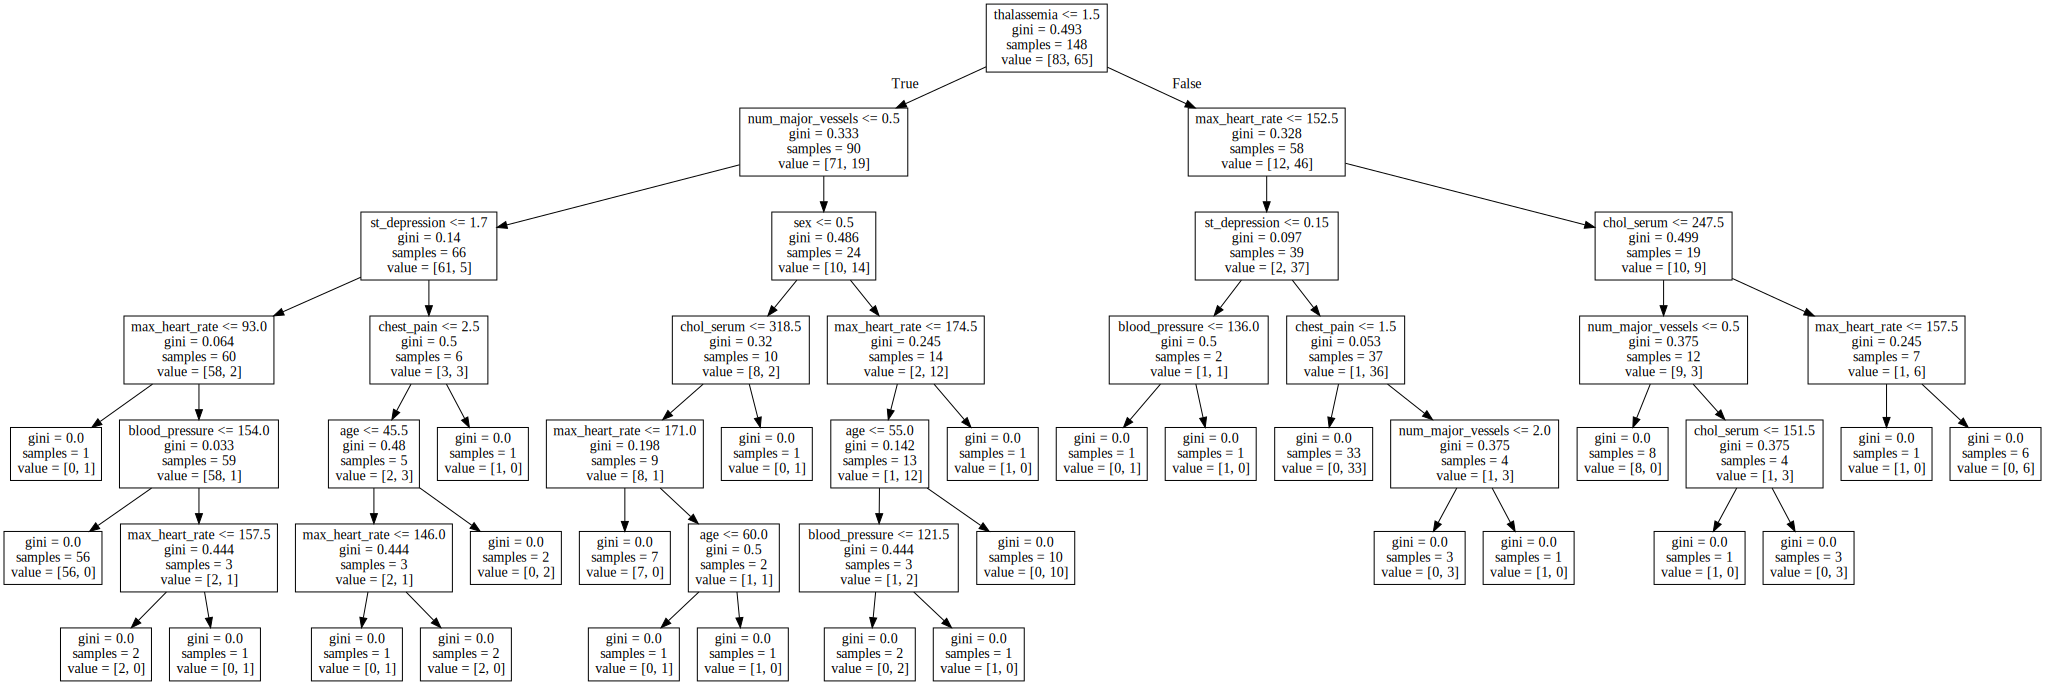

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = heart.drop(['diagnosis_CHD'], axis=1).columns)  
graph = gr.Source(dot_data)  
graph

The decision tree showed almost perfect training accurary, but low testing accuracy (below the logistic regression model). However, the confusion matrix reveals good results when it comes to true positives and true negatives. 

This performance can be explained by the decision tree classifier algorithm. Through segmenting the space and training the model on the training data, the generated tree will produce good predictions using the training data most likely due to overfitting. Therefore, the performance suffers from the overfitted model when using testing data for predictions.

However, it is still a helpful approach especially since we can generate a tree diagram to illustrate how the algorithm made the choices. For example, we can see that the first choice was made by checking if the maximum heart rate is over 147.5. This kind of comprehensive visualisation can be useful for e.g. doctors to cross check their diagnosis. 

## 3.3.2 Random Forest

The problem of overfitting for a single tree can be reduced by building a random forest. The algorithm works by constructing multiple decision trees which are then averaged. As a result, the variance is reduced, the bias however increased. Compared to a single decision tree, a better performance was expected. Additionally, the variable importance can be ranked to find out which features are the most significant.

In [29]:
Y = heart['diagnosis_CHD']
X = heart.drop(['diagnosis_CHD'], axis=1)

In [30]:
#Select 50% of the data as training data 
X_for_train, X_for_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

Training a Model using Random Forest

We see that the training accuracy is 1.0

Accuracy on the testing data: 0.738255033557047

Precision, Recall, F-Score
(0.2840909090909091, 0.3472222222222222, 0.3125, None)

Using Random Forest, these are the features according to their importance:


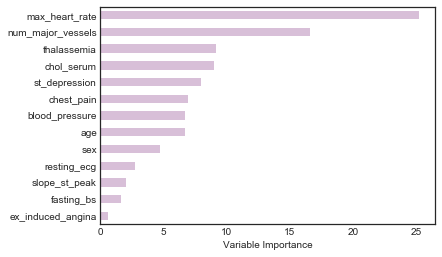

In [31]:
randForest = RandomForestClassifier()
randForest.fit(X_for_train, Y_train)

predForest = randForest.predict(X_for_test)

classesF = randForest.classes_

threshold = 0.5
newPredForest = []

for a in predForest:
    if a > threshold:
        newPredForest.append(classesF[0])
    else:
        newPredForest.append(classesF[1])
 
print('Training a Model using Random Forest')
print("\nWe see that the training accuracy is %s" %(clf.score(X_for_train, Y_train)) )
tree_Forest = accuracy_score(Y_test, predForest)
print('\nAccuracy on the testing data: %s' % tree_Forest)
print('\nPrecision, Recall, F-Score')
print(precision_recall_fscore_support(Y_test, newPredForest, pos_label = 1, average = 'binary'))

print('\nUsing Random Forest, these are the features according to their importance:')
importance = pd.DataFrame({'Importance': randForest.feature_importances_*100}, index=X.columns)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='thistle', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In comparison to a single decision tree, there was an improvement of the accuracy on the testing data by around 5% (accuracy around 78-79% ). Additionally, through the ranking of features according to their importance, it was evident that 'thalassemia', 'max_heart_rate' and 'num_major_vessels' were selected as top 3 (with 'age' on the same level as 'max_heart_rate'). These were the same three features that were chosen when performing kNN with 25% feature selection.

## 3.3.3 Gradient Boost 

Another approach to handle overfitting of a single decision tree is to use gradient boosted trees. In boosting, trees are grown sequentially and each tree is constructed using information from previously grown trees. These trees can be small consisting of few terminal nodes. Since the algorithm considers previous tree, the boosting model learns "slowly". Again, a better testing accuracy in comparison to the single decision tree is expected.

In [32]:
#our predictor is 'diagnosis_CHD' based on all the remaining features
Y = heart['diagnosis_CHD']
X = heart.drop(['diagnosis_CHD'], axis=1)

In [33]:
#Select 50% of the data as training data 
X_boost_train, X_boost_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

Training a Model using Gradient Boosting

We see that the training accuracy is 1.0

Accuracy on the testing data: 0.7718120805369127

Precision, Recall, F-Score
(0.24705882352941178, 0.2916666666666667, 0.267515923566879, None)


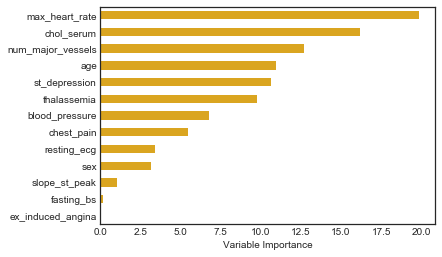

In [34]:
gradientBoost = GradientBoostingClassifier()
gradientBoost.fit(X_boost_train, Y_train)

predBoost = gradientBoost.predict(X_boost_test)

classesB = gradientBoost.classes_

threshold = 0.5
newPredBoost = []

for b in predBoost:
    if b > threshold:
        newPredBoost.append(classesB[0])
    else:
        newPredBoost.append(classesB[1])
        
print('Training a Model using Gradient Boosting')
print("\nWe see that the training accuracy is %s" %(clf.score(X_boost_train, Y_train)) )
tree_Boost = accuracy_score(Y_test, predBoost)
print('\nAccuracy on the testing data: %s' % tree_Boost)
print('\nPrecision, Recall, F-Score')
print(precision_recall_fscore_support(Y_test, newPredBoost, pos_label = 1, average = 'binary'))  

importance1 = pd.DataFrame({'Importance': gradientBoost.feature_importances_*100}, index=X.columns)
importance1.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='goldenrod', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In comparison to the single decision tree, the accuracy was improved using gradient boosted trees, but only by 2-3% on average. The variable importance showed that 'max_heart_rate', 'chol_serum' and 'num_major_vessels' were the most significant.  

The three tree models performed with various accuracy, with almost perfect training accuracy (most likely due to overfitting) and a testing accuracy ranging from 74% to 78%.

The interesting insight from these models were the rankings of variable importance. The decision tree made the first split based on 'max_rate_rate' (over 147.5) with two options - 'thalassemia' (True) and 'num_major_vessels' (False). This will be expanded upon in the conclusion.

# 3.4 Neural Network

Neural Networks are machine learning systems inspired by the neurons in animal brains. If a nerve cell receives a signal from a different cell that is above the threshold, an action potential will be generated - the cell will fire. Depending on the signal, the action potential will be passed on to another cell or not.

The multilayer perceptron (MLP) is a neural network model that works in a similar way. It maps sets of input data onto a set of appropriate outputs. The input layer receives a signal, and the output layer makes a prediction. Inbetween, there are hidden layers with multiple neurons which fire depending on some type of activation function.

This project will examine three different MLPs. The amount of hidden layers varied from two to four, the number of neurons was held consistent at ten. Three activation functions were used: relu, tanh and logistic.

In [35]:
Y = heart['diagnosis_CHD']
X = heart.drop(['diagnosis_CHD'], axis=1)

In [36]:
#Select 50% of the data as training data 
X6_train, X6_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [37]:
print('Train Neural Network with two hidden layer and activation function relu\n')
nn1 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation='relu', random_state=1)
nn1.fit(X6_train, Y_train)
pred1 = nn1.predict(X6_test)

cM1 = pd.DataFrame(confusion_matrix(Y_test, pred1).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print('Confusion Matrix')
print(cM1)

ac1 = accuracy_score(Y_test, pred1)
print('Accuracy is %s' %ac1)

####
print("\nUsing MLP with 3 layers and activation function logistic:\n")
nn2 = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, activation='logistic', random_state=1)
nn2.fit(X6_train, Y_train)
pred2 = nn2.predict(X6_test)

cM2 = pd.DataFrame(confusion_matrix(Y_test, pred2).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print('Confusion Matrix')
print(cM2)

ac2 = accuracy_score(Y_test, pred2)
print('\nAccuracy is %s' %ac2)

#####
print('\nAdding another hidden layer and using activation function tanh:\n')
nn3 = MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=1000, activation='tanh', random_state=1)
nn3.fit(X6_train, Y_train)
pred3 = nn3.predict(X6_test)

cM3 = pd.DataFrame(confusion_matrix(Y_test, pred3).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print('Confusion Matrix')
print(cM3)

ac3 = accuracy_score(Y_test, pred3)
print('\nAccuracy is %s' %ac3)

Train Neural Network with two hidden layer and activation function relu

Confusion Matrix
     No  Yes
No   26   10
Yes  51   62
Accuracy is 0.5906040268456376

Using MLP with 3 layers and activation function logistic:

Confusion Matrix
     No  Yes
No   77   72
Yes   0    0

Accuracy is 0.5167785234899329

Adding another hidden layer and using activation function tanh:

Confusion Matrix
     No  Yes
No   35   20
Yes  42   52

Accuracy is 0.5838926174496645


The three neural networks performed with similar accuracy under 60%. 

The MLP with three hidden layers and logistic activation function was the least accurate with only 51.68%. It was unable to identify any true positive cases, which was the most important aspect since the goal was to predict a heart disease. 
The MLP with two hidden layers and relu function showed the best accuracy of 59.06% and was able to correctly classify 62 cases of patients with heart problems.
The MLP with four hidden layers and tanh activation function perfomed similarily to the two layered MLD.

The low accuracy could be contributed to the small data set of only 300 entries. The MLP classifiers were only trained using half the data, so a larger data set would lead to more accurate and reliable results.
Additionally, the MLP only considered thirteen features to predict a heart disease. Adding more features could help the algorithm make the right connections between the neurons.

# 5. Machine Learning: Possible Applications and Ethics in Health Care

I personally think that health care can benefit from machine learning to predict e.g. a heart disease.

I can see doctors using models to assist with diagnosis which would be helpful for both the patient and the practitioner. Such an application could speed up the process and allow for more patients to be treated - without the additional stress for staff. Especially with an increasing aging population, more resources are needed to treat patients and hospitals are often understaffed. Using machine learning could help the medical staff to manage the heavy work load (hopefully without any compromises in quality).

In the field of research, feature selection or decision trees can be useful when trying to narrow down the cause of a disease. It can be helpful to at least get a feel for where to look for and what kind of experiments to conduct.

Predicting health data from unknown patients based on some selected features opens new ways in which health care services can improve. In case of an emergency situation, knowing that the patient has had a history of coronary heart diseases can be fatal. This information can be used to calculate e.g. the therapeutic dosages of certain drugs or for the ambulances to prioritise and prepare for more urgent situations.

However, the tools of machine learning, as an emerging technological field, have the potential to be misused. For example, heath insurance companies would be interested in predicting a customer's health status in order e.g. to adjust the rates or to even deny service to customers that are of risk. 

Another thing to be considered is the risk of privacy breach. Data gathered and then processed for machine learning purposes is very sensitive, especially in the health care industry. There have to be regulations in place in order to protect the individual privacy if this technology should be used in hospitals on a regular basis.

#  6. Conclusion 

This project explored different machine learning algorithms to predict a heart disease based on different features.

Using k-Nearest Neighbours, the highest accuracy of 65.77% was obtained using k = 10 and at least 75% of the features or age and sex. Through feature selection, it was found that 'max_heart_rate' (maximum heart rate achieved), 'num_major_vessels' (number of major vessels affected) and 'thalassemia' (faulty hemoglobin synthesis) were of most importance. 

For logistic regression, the model with all features performed the most accurate out of all the models with an accuracy of 80.54%. Applying feature selection to the logistic regression model showed that the same three features were selected.

The single decision tree was only 69.00% accurate when predicting a heart attack. However, the visualisation of the decision tree was the most interpretable and therefore the most helpful. The performance of the tree was improved to 74-78% using gradient boost and random forests as they handled the problems of overfitting. Here, it was possible to rank the variables according to their importance and again, the same three features were on top.

The neural networks performed with various accuracy from 51-59%. For future projects, it would be of interest to consider a larger data set with more features to see if accuracy can be improved.


The project gave insight on which features are the most significant when predicting a heart disease. Through feature selection, the maximum heart rate, number of vessels affected and thalassemia can be used to predict a CHD. It was also shown that just considering age and sex, it is possible to get an accuracy above 65%.

This type of knowledge would be helpful in investigating what factors are most significant when predicting heart diseases. 
Especially the decision tree can give insights as to which factors can be used.

We can interpret the results in the following way:

Heart rate is a risk factor for a cardiovascular disease, in fact it is considered the "best predictor after myocardial infarction", so it would be the first feature to examine (Cook, et al, 2006). 

Thalassemia is an inherited recessive blood disorder characterised by synthesis of hemoglobin of abnormal form or in insufficient amounts. People who suffer from thalassemia can have mild or severe, life-threatening anemia (Clarke & Higgins, 2000). Often, this is associated with an abnormal heart rate, and there is a higher risk of cardiovascular disease. To know if a patient has thalassemia could help in determining heart disorders.

The other major factor for a heart disease is 'num_major_vessels', so the number of major cardiovascular vessels affected. With age, plaque builds up on the inner sides of the blood vessel walls. This causes the vessels to become less flexible and elastic. Eventially, the arteries cannot handle the blood flow to the heart muscle. This can lead to a heart attack. What contributes to it is high levels of cholesterol as it plugs up the arteries as well, and we can see in the tree that it is associated with it.

We can interpret one branch of the decision tree in the following way:
A person has a heart disease if their heart rate is not over 147.5 and less than 0.5 vessels are affected. Further on, the levels of cholesterol are over 272.5 and over 291.0 and the ECG shows an ST-depression over 1.45 mm. A Gini index of zero tells us that all the observation belong to the one class ('we can be sure'). This method can be applied to each of the branches to understand how the machine makes its diagnosis.


Machine learning has a variety of applications especially in medical diagnostics. This project demonstated that this type of statistical learning can be useful in determining health problems and the features associated with it. 

# 7. References

1. 1.10. Decision Trees — scikit-learn 0.19.1 documentation. (2017). Retrieved from http://scikit-learn.org/stable/modules/tree.html
2. Clarke, G. M., & Higgins, T. N. (2000). Laboratory investigation of hemoglobinopathies and thalassemias: review and update. Clinical chemistry, 46(8), 1284-1290.
3. Cook, S., Togni, M., Schaub, M. C., Wenaweser, P., & Hess, O. M. (2006). High heart rate: a cardiovascular risk factor?. European heart journal, 27(20), 2387-2393.
4. Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository: Heart Disease Data Set. Irvine, CA: University of California, School of Information and Computer Science. Retrieved from: 
http://archive.ics.uci.edu/ml/datasets/heart+disease
5. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). An Introduction to Statistical Learning: with Applications in R (7th ed.). Springer.
6. Murray, G. (2018). COMP381: Machine Learning, Lecture 4, 5, 6, 8, and 9. [PowerPoint slides]. Retrieved from https://myclass.ufv.ca/webapps/blackboard/content/listContent.jsp?course_id=_30441_1&content_id=_769354_1
7. Public Health Agency of Canada. (2017, January 30). Heart disease – heart health. Retrieved from https://www.canada.ca/en/public-health/services/diseases/heart-disease-heart-health.html